In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
import io
from PIL import Image
import os
from scipy.stats import stats
import matplotlib.image as mpimg
from matplotlib.image import imread

(388, 2880, 3)
file:  10_80621


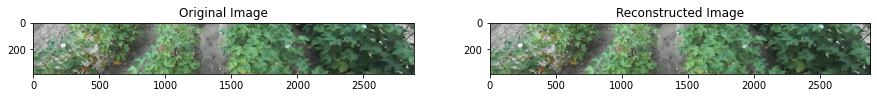

(768, 2880, 3)
(474, 2880, 3)
file:  1_080621


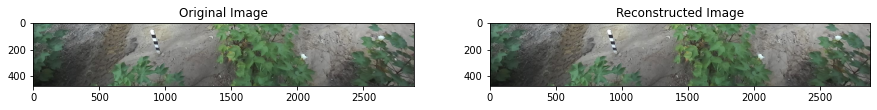

(606, 2878, 3)
(430, 2880, 3)
file:  3_080621


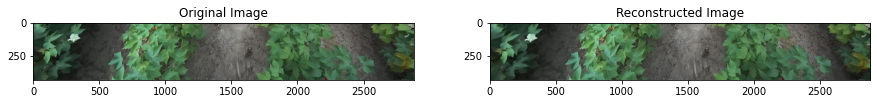

(510, 2880, 3)
(518, 2880, 3)
file:  5_080621


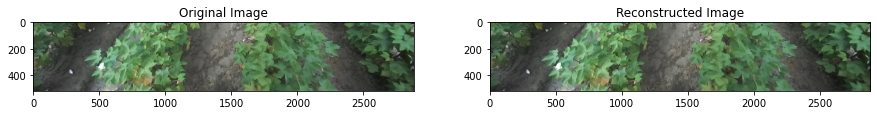

(664, 2880, 3)
(578, 2878, 3)
file:  7_80621


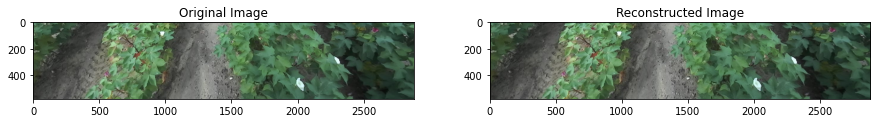

(448, 2880, 3)
(600, 2832, 3)
file:  9_80621


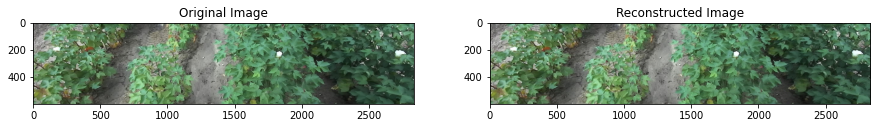

In [31]:
directory = '../Cotton_data/Splices/'

pca_b = PCA(n_components=100)
pca_g = PCA(n_components=100)
pca_r = PCA(n_components=100)

blue_variance = []
green_variance = []
red_variance = []

image_byte_size = 0
components_byte_size = 0

listsize = 0

for filename in os.listdir(directory):
    # pca process for each image in directory
    listsize += 1
        
    f = os.path.join(directory, filename)
    img = cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB)
    print(img.shape)
    image_byte_size += img.nbytes
    blue, green, red = cv2.split(img)
    
    df_blue = blue/255
    df_green = green/255
    df_red = red/255
    
    pca_b.fit(df_blue)
    trans_pca_b = pca_b.transform(df_blue)
    pca_g.fit(df_green)
    trans_pca_g = pca_g.transform(df_green)
    pca_r.fit(df_red)
    trans_pca_r = pca_r.transform(df_red)
    
    f_no_stem = filename.split('.')[0]
    np.savez_compressed('../Cotton_data/Splices_compressed/pca_'+f_no_stem, b=np.float16(trans_pca_b), g=np.float16(trans_pca_g), r=np.float16(trans_pca_r))
    components_byte_size += np.float16(trans_pca_b).nbytes*3
    
    blue_variance.append(sum(pca_b.explained_variance_ratio_))
    green_variance.append(sum(pca_g.explained_variance_ratio_))
    red_variance.append(sum(pca_r.explained_variance_ratio_))
    
    # exact pca model may also need to be saved? because pca for each channel is fit
    if (listsize % 2 == 1):
        compressed_np = np.load('../Cotton_data/Splices_compressed/pca_'+f_no_stem+'.npz')
        
        blue_c = compressed_np['b']
        green_c = compressed_np['g']
        red_c = compressed_np['r']

        b_arr_c = pca_b.inverse_transform(blue_c)
        g_arr_c = pca_g.inverse_transform(green_c)
        r_arr_c = pca_r.inverse_transform(red_c)

        img_reconstruct = (cv2.merge((b_arr_c, g_arr_c, r_arr_c)))

        print("file: ", f_no_stem)
        fig = plt.figure(figsize=(15, 7.2))
        fig.add_subplot(121)
        plt.title("Original Image")
        plt.imshow(img)
        fig.add_subplot(122)
        plt.title("Reconstructed Image")
        plt.imshow(np.clip(img_reconstruct, 0, 1))
        plt.show()
        plt.imsave('../Cotton_data/Splices_compressed/reconstructed'+f_no_stem+'.jpg', np.clip(img_reconstruct, 0, 1))

In [5]:
print("Images size: ", image_byte_size)
print("Components size: ", components_byte_size)
print("Percent Reduction: ", (image_byte_size-components_byte_size)/image_byte_size * 100)

Images size:  51608256
Components size:  3590400
Percent Reduction:  93.04297358934198


In [20]:
print("Number of images in folder: ", listsize)
print("Blue variance average = ", sum(blue_variance)/listsize)
print("Green variance average = ", sum(green_variance)/listsize)
print("Red variance average = ", sum(red_variance)/listsize)

Number of images in folder:  11
Blue variance average =  0.9815818040572352
Green variance average =  0.9861260694079532
Red variance average =  0.9834642595052311


(600, 2832, 3)


Text(0, 0.5, 'Explained variance Blue')

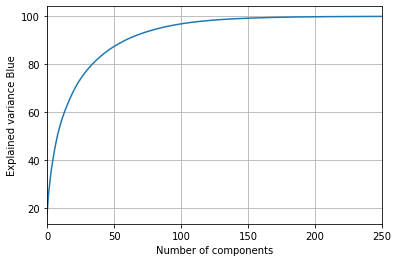

In [19]:
image_raw = imread("../Cotton_data/Splices/9_80621.jpg")
blue,green,red = cv2.split(image_raw)
print(image_raw.shape)

# normalization
df_blue = blue
df_green = green
df_red = red

#max n_components = 600
pca_b_orig = PCA(n_components=600)
pca_b_orig.fit(df_blue)

pca_g_orig = PCA(n_components=600)
pca_g_orig.fit(df_green)

pca_r_orig = PCA(n_components=600)
pca_r_orig.fit(df_red)

plt.grid()
plt.plot(np.cumsum(pca_b_orig.explained_variance_ratio_ * 100))
plt.xlim(0, 250)
plt.xlabel('Number of components')
plt.ylabel('Explained variance Blue')

Text(0, 0.5, 'Explained variance Green')

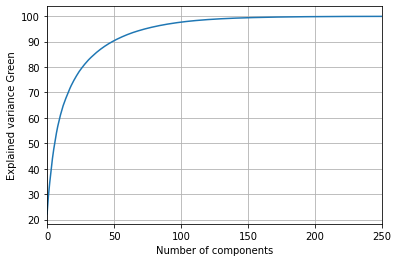

In [21]:
plt.grid()
plt.plot(np.cumsum(pca_g_orig.explained_variance_ratio_ * 100))
plt.xlim(0, 250)
plt.xlabel('Number of components')
plt.ylabel('Explained variance Green')

Text(0, 0.5, 'Explained variance Red')

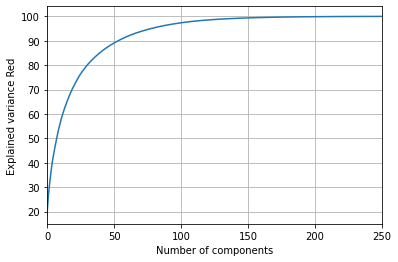

In [22]:
plt.grid()
plt.plot(np.cumsum(pca_r_orig.explained_variance_ratio_ * 100))
plt.xlim(0, 250)
plt.xlabel('Number of components')
plt.ylabel('Explained variance Red')